**Autor:** Dávid Dráb  <br> *[Prírodovedecká fakulta](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), Univerzita Pavla Jozefa Šafárika, Košice 2022* <br> email: [david.drab163@gmail.com](mailto:david.drab163@gmail.com).
***
**<font size=6.5 color=darkblue> Analýza hlavných komponentov pre funkconálne dáta II </font>**  

**<font size=5.5 color=darkblue> Obsah </font>** <br>
1. Úmrtnosť mužov na Slovensku v rokoch 1950 až 2019 <br>
2. Výnosy Istanbulskej burzy cenných papierov

**<font size=5 color=darkblue> 1. Úmrtnosť mužov na Slovensku v rokoch 1950 až 2019 </font>** <br>

**<font size=4 color=darkblue> 1.1 Popis skúmaných dát </font>** <br>

Našimi skúmanými dátami sú logaritmické hodnoty miery úmrtnosti mužov na Slovensku vo veku 0 až 97 medzi rokmi 1950 až 2019. Môžeme vidieť, že majú charakter tzv. rastových kriviek.

In [1]:
# instalacia a inicializacia potrebnych balikov a kniznic
# instalacia a inicializacia potrebnych balikov a kniznic
library("fda")
library("readr")
library("refund")

Warning message:
"package 'fda' was built under R version 4.1.3"
Loading required package: splines

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS

Loading required package: pcaPP

Loading required package: RCurl

Loading required package: deSolve


Attaching package: 'fda'


The following object is masked from 'package:graphics':

    matplot


Warning message:
"package 'refund' was built under R version 4.1.3"


In [2]:
umrtnost_SVK_muzi <- read_delim("C:/Users/david/jupyter_ntb/umrtnost_SVK_muzi.csv", 
    delim = ";", escape_double = FALSE, trim_ws = TRUE)

data<-as.matrix(umrtnost_SVK_muzi)
data2<-log(data)
vek<-1:98
n<-ncol(data2)

Rows: 98 Columns: 70
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ";"
dbl (70): 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


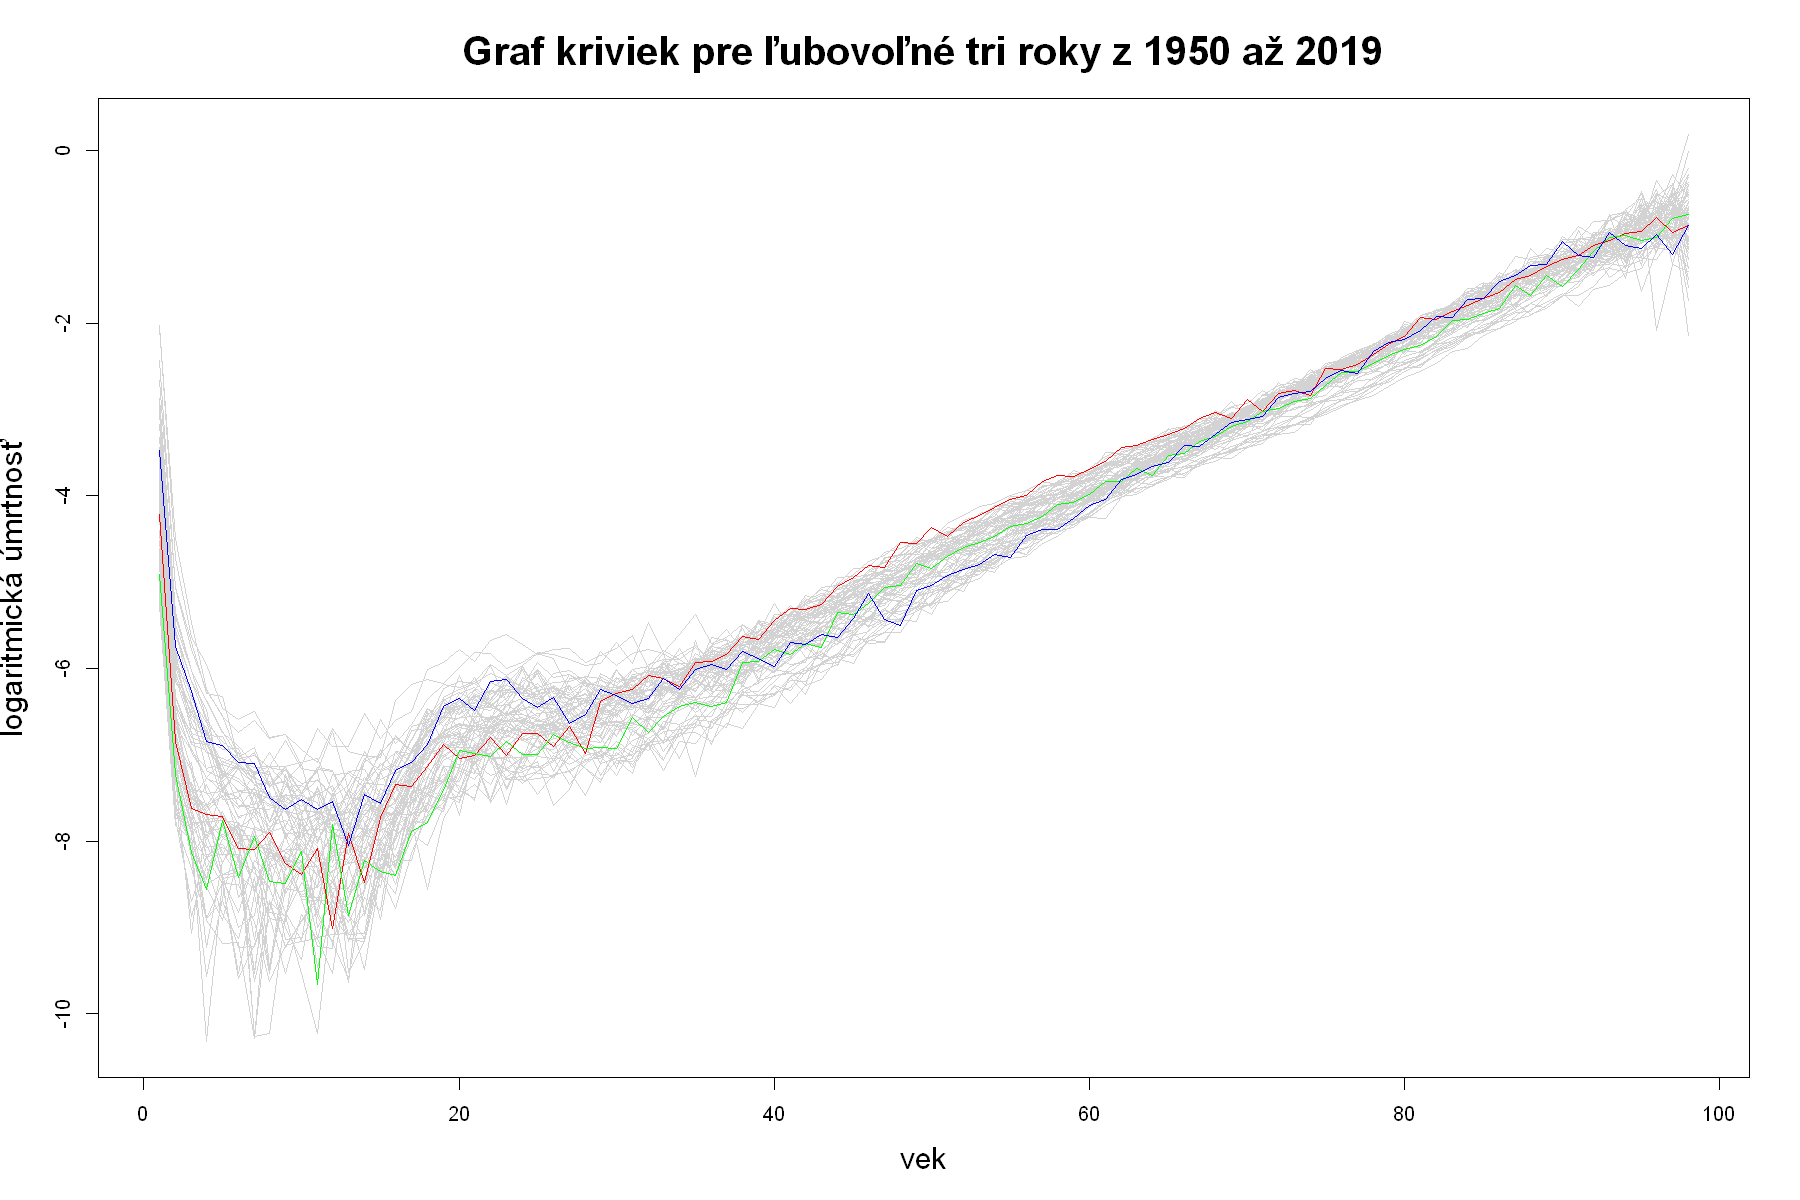

In [3]:
options(repr.plot.width=15, repr.plot.height=10)
matplot(vek,data2, type='l', lty=1, col="lightgray", main="Graf kriviek pre ľubovoľné tri roky z 1950 až 2019", 
        cex.main=2, cex.lab=1.55, ylab="logaritmická úmrtnosť")
vybrane_krivky<- sample(1:n, size = 3, replace = FALSE)
matlines(data2[,vybrane_krivky], type='l', lty=1, lwd=1, col = rainbow(3))

Na grafe môžeme vidieť celkom výraznú odchýlku do 20. roka života a menšiu medzi 20. a 40. rokom života, čo môže popisovať celkový pokrok v spoločnosti, resp. v poskytovanej zdravotnej starostlivosti pre deti a dorast. To isté by mohlo platiť aj pre síce menšiu odchýlku vo vysokom veku nad 90 rokov.

**<font size=4 color=darkblue> 1.2 Implementácia FPCA a interpretácia výsledkov </font>** <br>

Teraz si vyhladíme všetky naše krivky pomocou funkcie gam a následne si vykreslíme pôvodné a vyladené vybrané krivky.

Warning message:
"package 'mgcv' was built under R version 4.1.3"
Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



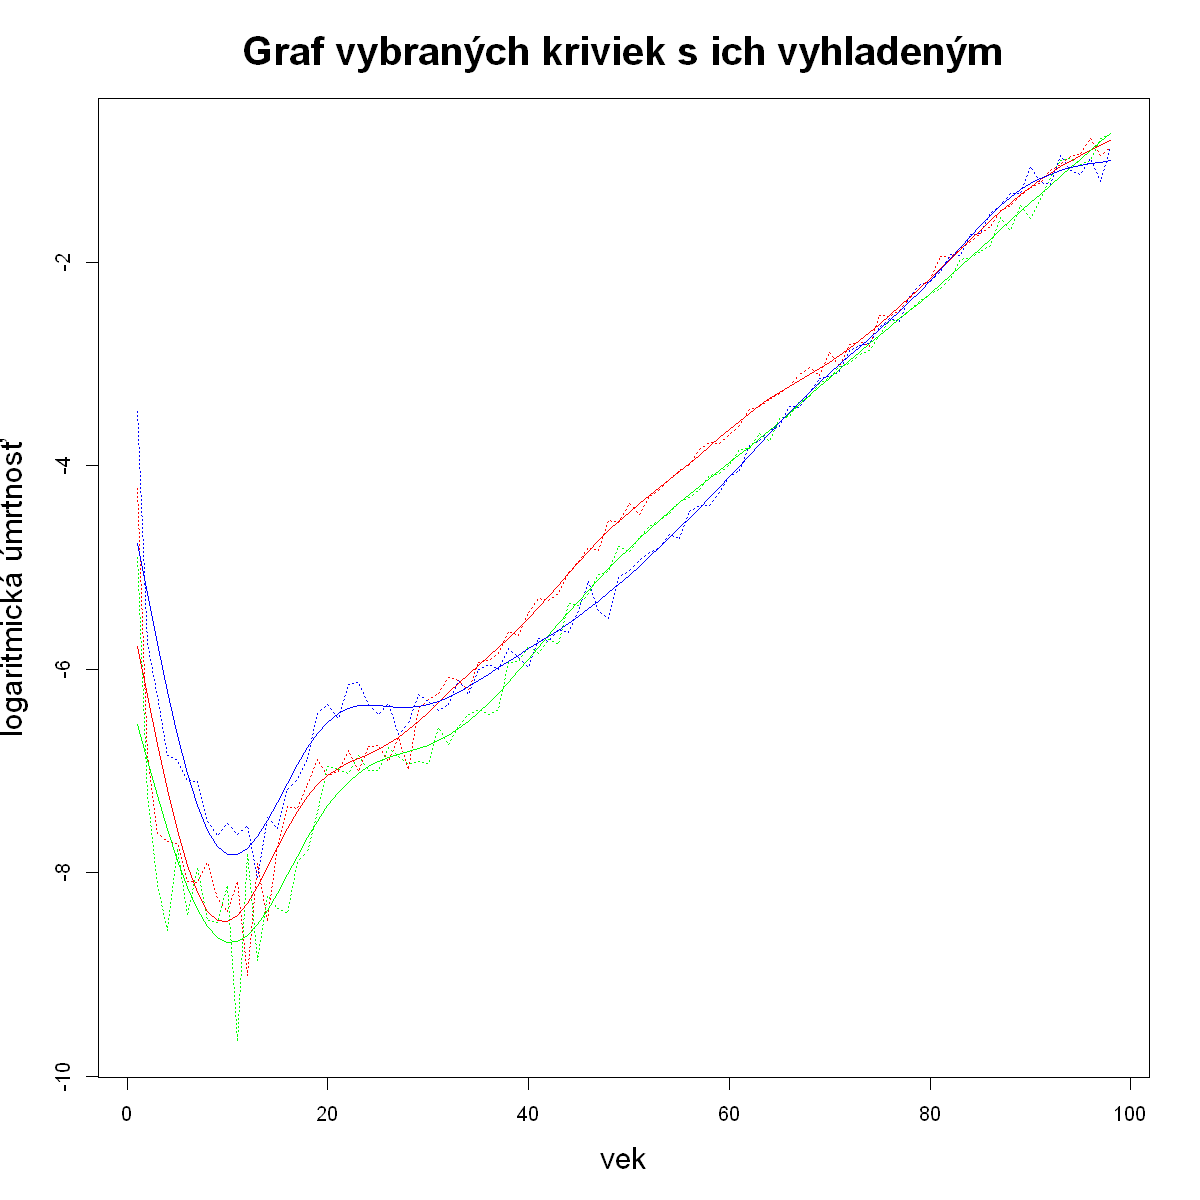

In [4]:
library(mgcv)
vyhladene_krivky<- array(0, dim(data2))
for(j in 1:n){
  fit <- gam(data2[,j] ~ s(vek,k=15, bs = 'tp'), method = "REML")
  vyhladene_krivky[,j] <- fit$fitted
}

options(repr.plot.width=10, repr.plot.height=10)
matplot(vek,data2[,vybrane_krivky], 
        type='l', lty=3, lwd=1, col = rainbow(3), main="Graf vybraných kriviek s ich vyhladeným", cex.main=2, cex.lab=1.55, 
        ylab="logaritmická úmrtnosť")
matlines(vek,vyhladene_krivky[,vybrane_krivky], 
         type='l', lty=1, lwd=1, col = rainbow(3))

Pre FPCA je dôležitá funckia premeru vyhladených kriviek.

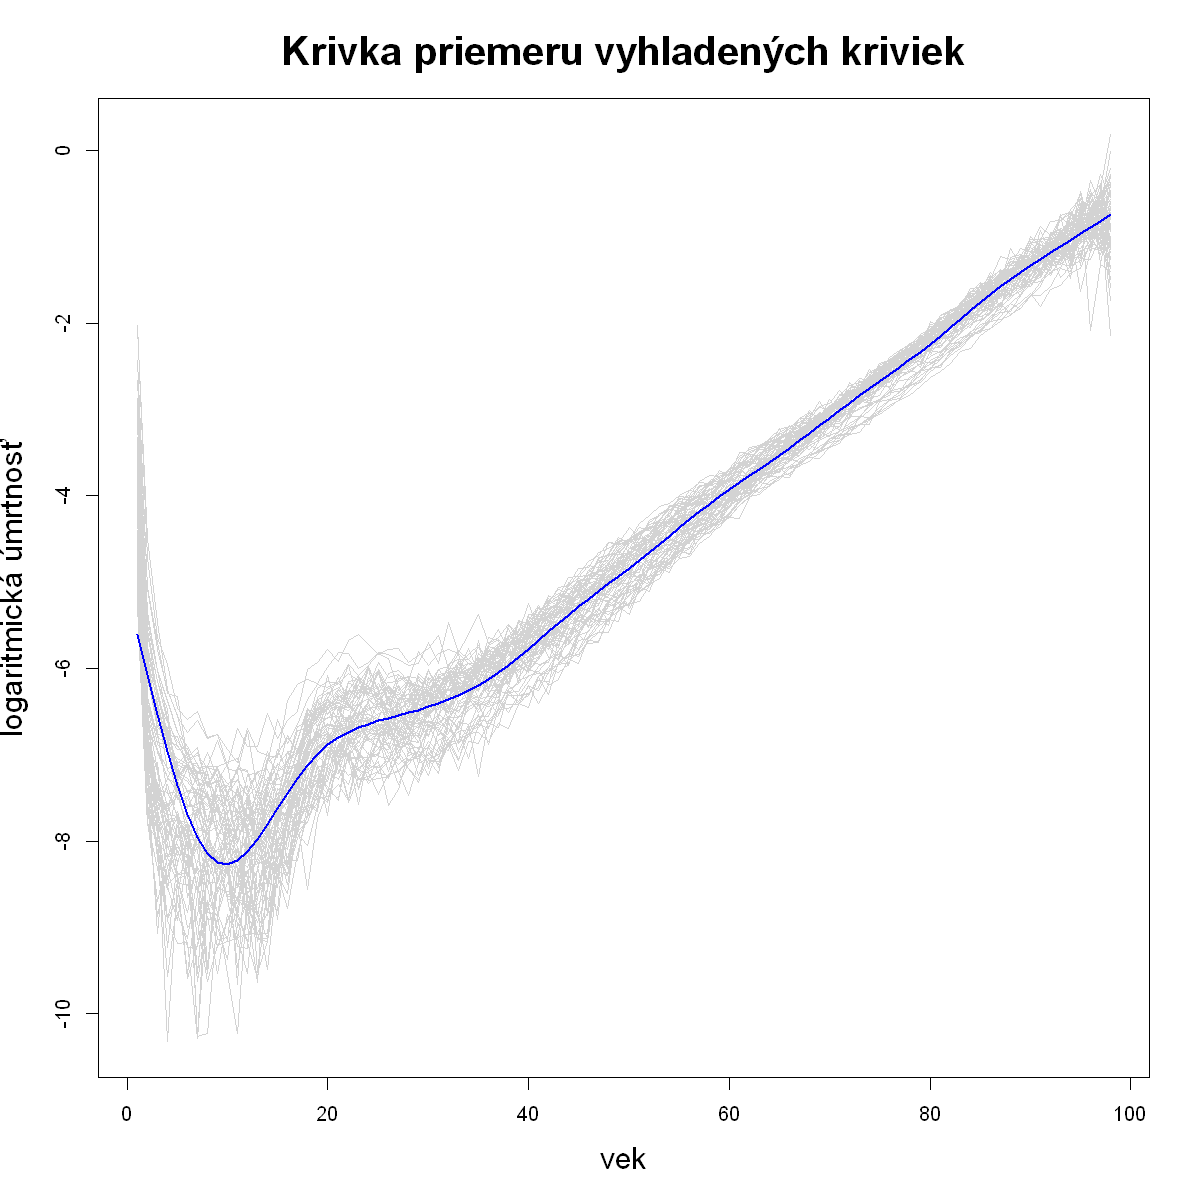

In [5]:
mean.hat <- rowMeans(vyhladene_krivky)
options(repr.plot.width=10, repr.plot.height=10)
matplot(vek, data2, type='l', lty=1, col="lightgray", main="Krivka priemeru vyhladených kriviek", cex.main=2, cex.lab=1.55
       , ylab="logaritmická úmrtnosť")
lines(mean.hat, col='blue', lwd=2)

Ďalšou podstatnou funkciou je funkcia kovariancie vyhladených kriviek.

Warning message:
"package 'fields' was built under R version 4.1.3"
Loading required package: spam

Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get started.



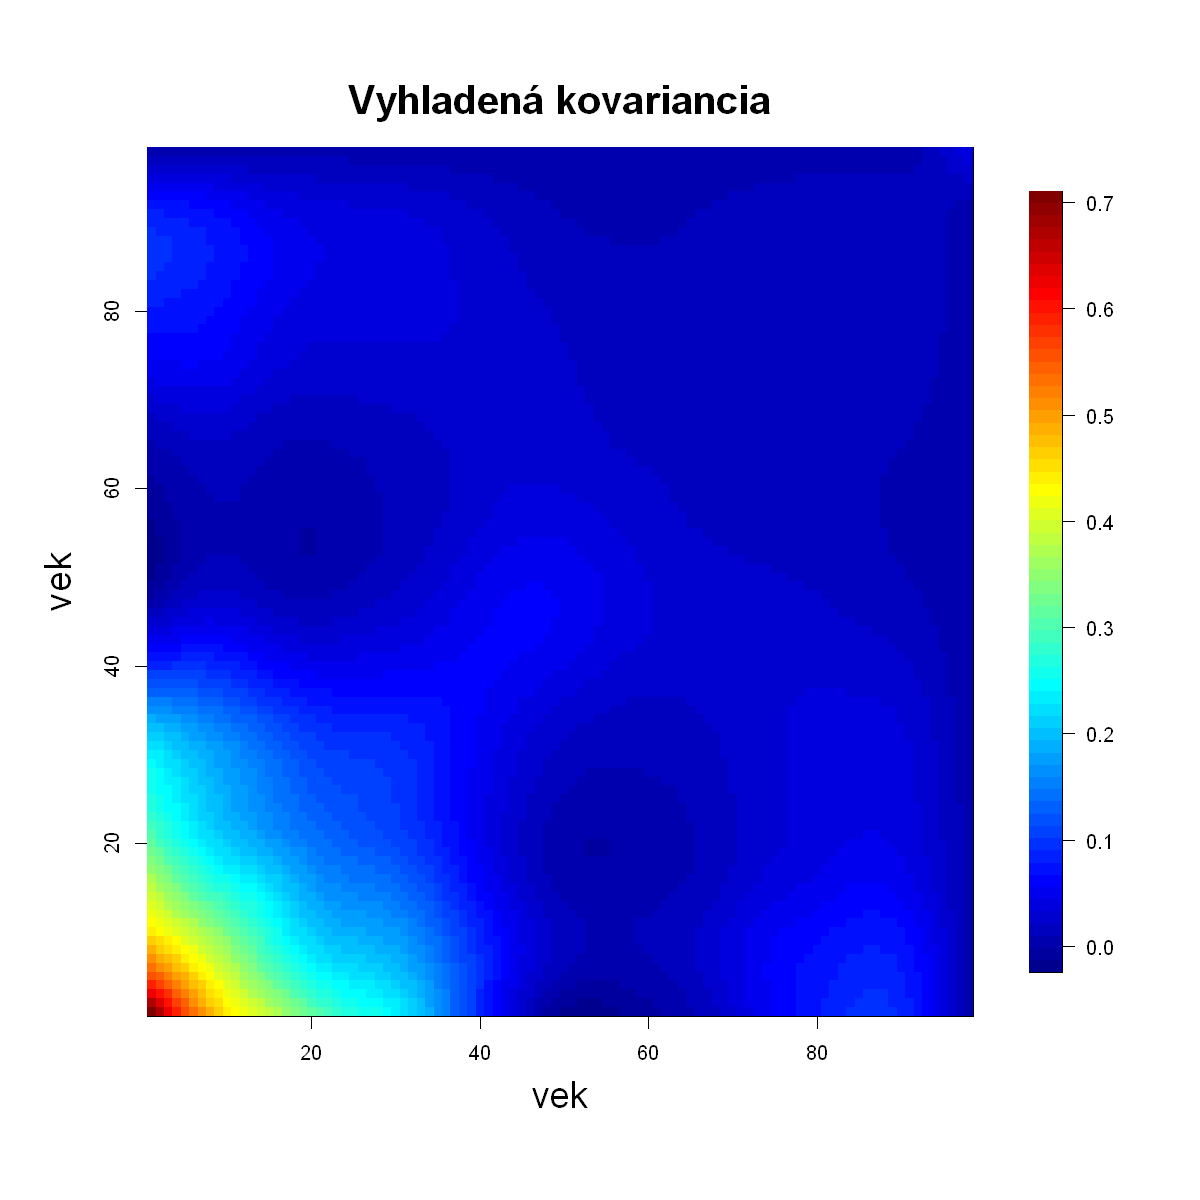

In [6]:
library(fields)

vyhladena_kov <- cov(t(vyhladene_krivky))
options(repr.plot.width=10, repr.plot.height=10)
image.plot(vek, vek, vyhladena_kov, main='Vyhladená kovariancia', cex.main=2, cex.lab=1.85)

Môžeme vidieť, že do približne 20. roku života sú krivky mierne závislé. Po 40. roku života už nevykazujú skoro žiadnu závislosť.

Teraz prevedieme ("ručne") výpočet pre získanie vlastných funkcií, či určenia počtu komponentov.

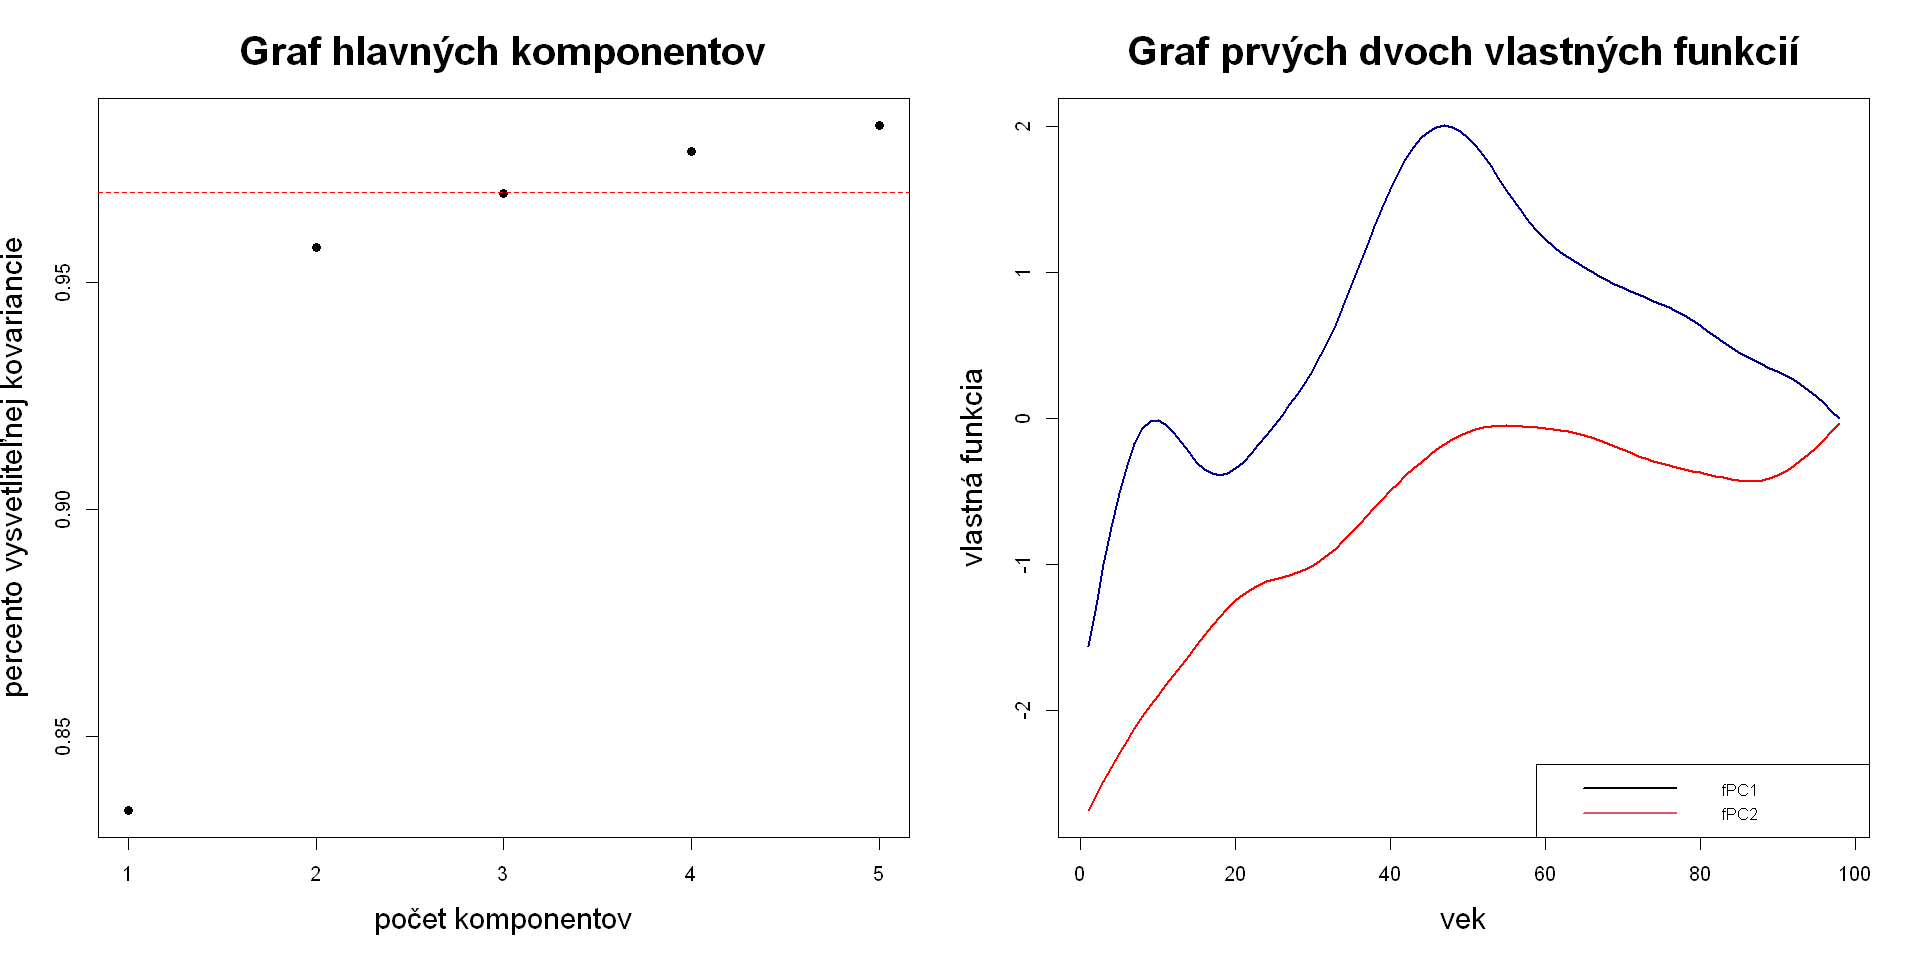

In [7]:
svd.result0 <- eigen(vyhladena_kov, symmetric = TRUE)

evectors <- svd.result0$vectors[,svd.result0$values > 0]
evalues <- svd.result0$values[svd.result0$values > 0]

par(mfrow=c(1,2))

efns0 <- evectors*sqrt(98)
evals0 <- evalues/98
pve <- cumsum(evals0)/sum(evals0)
npc <- sum(pve < 0.97) + 1

efns <- efns0[,1:npc]
evals <- evals0[1:npc]

options(repr.plot.width=16, repr.plot.height=8)
plot(1:5, pve[1:5], pch = 16, 
     ylab="percento vysvetliteľnej kovariancie", xlab="počet komponentov",
     main="Graf hlavných komponentov", cex.main=2, cex.lab=1.5)
abline(h = 0.97, lty=2, col='red')

matplot(vek, efns[,1:2], col=c("red", "darkblue"), 
        type='l', lty=1, lwd=2,
        ylab="vlastná funkcia", xlab="vek",
        main="Graf prvých dvoch vlastných funkcií",cex.main=2, cex.lab=1.5)
legend("bottomright", lwd=2, lty=1, col=1:2, 
      legend = paste0("fPC", 1:2),cex=0.8)

Podľa grafu sme určili, že (až) 97% variancie vysvetlia 2 komponenty. Vysvetlenie a určenie vlastných funkcií je na tejto metóde najťažšie. Čierna prvá vlastná funkcia môže popisovať vývoj odchýlky od piremeru vyhladených kriviek. Zhruba do veku 40 rokov je odchýlka vyššia od priemeru, ako po veku 40 rokov. Červená druhá vlastná funkcia môže popisovať zmeny v úmrtnosti medzi približne 40. a 60. rokom života. Pre lepšie pochopenie si teraz ukážeme tieto skutočnosti podrobnejšie v nasledujúcich grafoch.


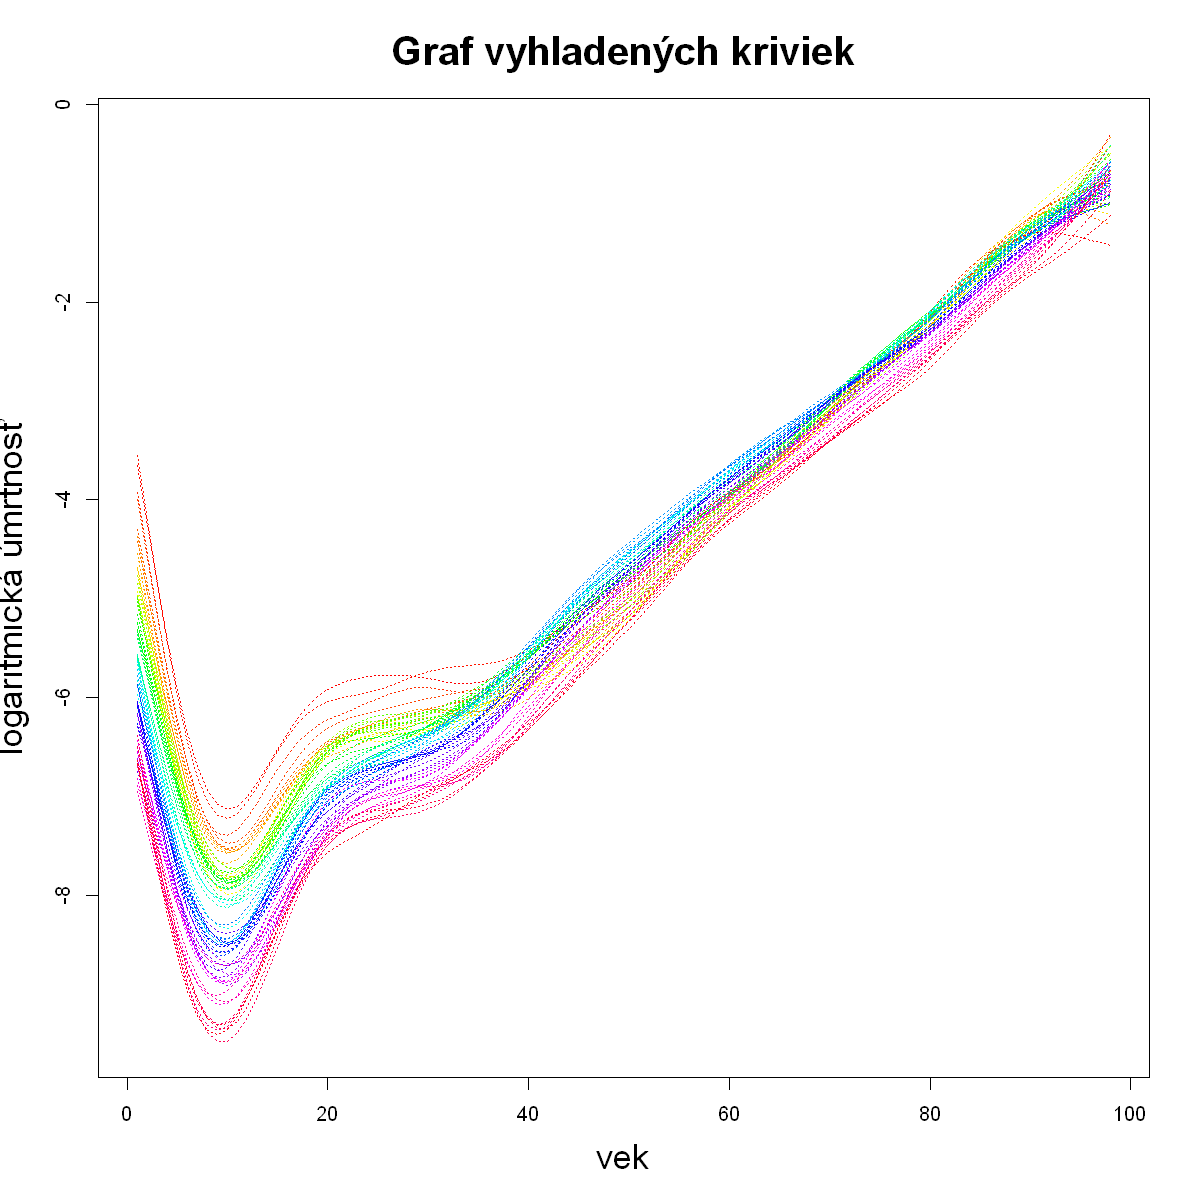

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
matplot(vek,vyhladene_krivky, 
        type='l', lty=3, lwd=1, col = rainbow(n), main="Graf vyhladených kriviek", cex.main=2, cex.lab=1.75,
        ylab="logaritmická úmrtnosť")

V grafe možeme vidieť, že zhruba od 30. veku života dochádza kk zmenám medzi jednotlivými krivkami, pričom je vidno aj zmeny vo vyššom veku. Časom sa rozptyl zmenšuje a tiež, že ako konkrétne dochádza k zmene v krivkách.

V programe R už existujú aj naprogramované metódy, ktoré ulahčujú výpočet. Nasledujúci kód nám vypočíta a vykreslí aj vlastné funkcie, ktoré sú totožné. 

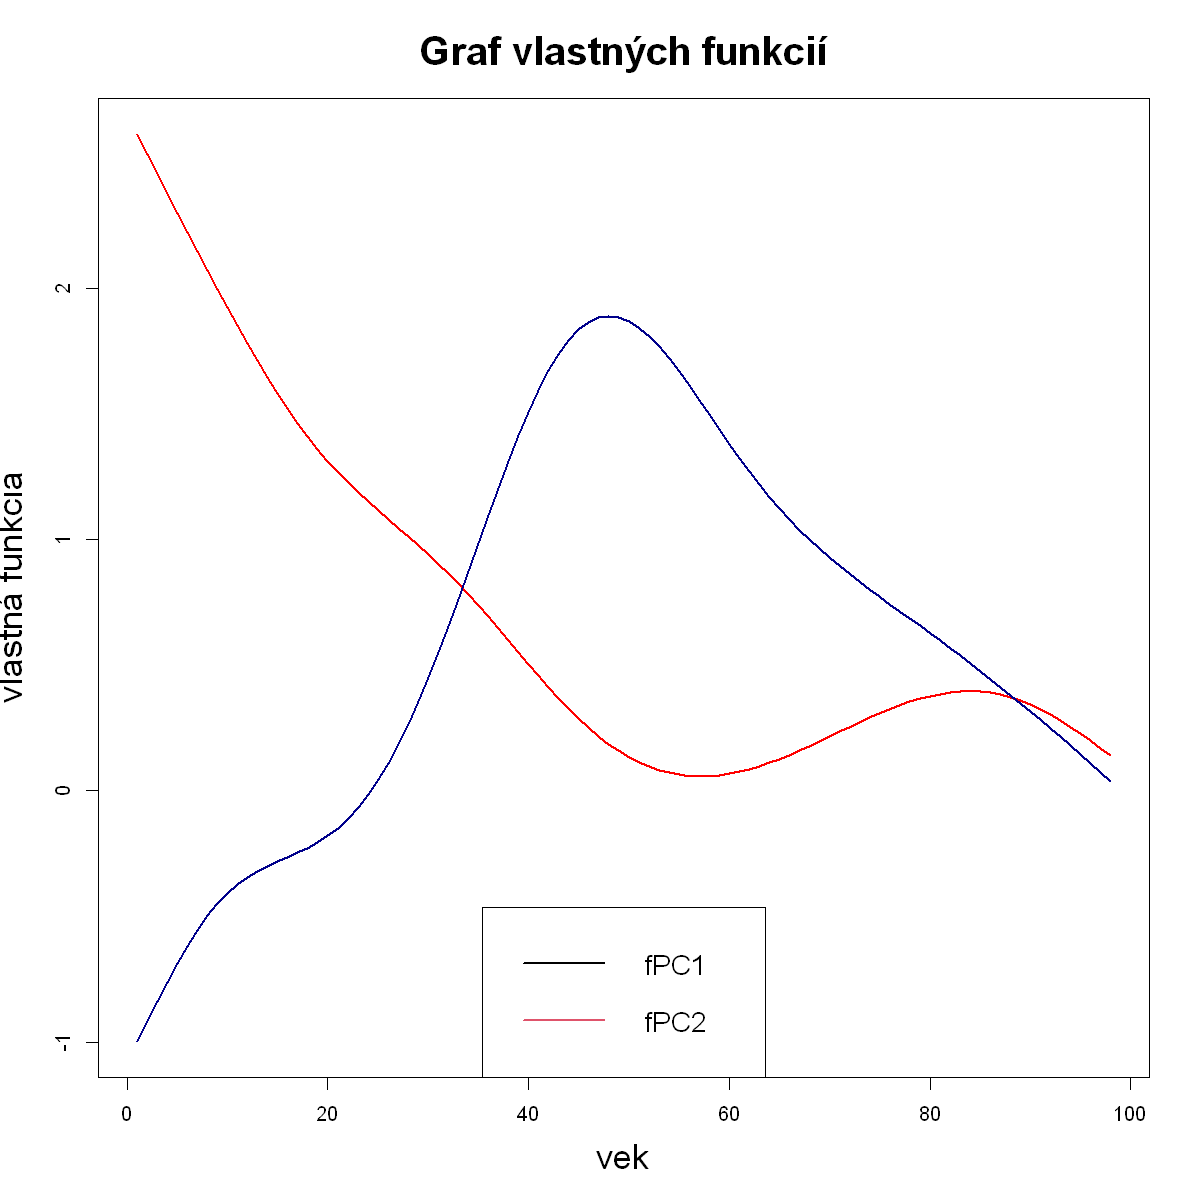

In [9]:
res.face <- fpca.face(Y = t(data2), argvals = vek, pve = 0.95)

efn.face <- res.face$efunctions*sqrt(98)
eval.face <- res.face$evalues/98

options(repr.plot.width=10, repr.plot.height=10)

matplot(vek, efn.face[,1:res.face$npc], col=c("red", "darkblue"), 
        type='l', lty=1, lwd=2,
        ylab="vlastná funkcia", xlab="vek",
        main="Graf vlastných funkcií", cex.main=2, cex.lab=1.75)
legend("bottom", lwd=2, lty=1, col=1:2, 
      legend = paste0("fPC", 1:2),cex=1.4)

Účinok každého komponentu by sme mohli vyzualizovať a to aj s pomocou $\mu(t) \pm 2\sqrt{\lambda_k}\phi_k(t).$ A na záver si vykeslíme aj vybrané vyhladené krivky s pôvodnými dátami vykeslenými ako body.


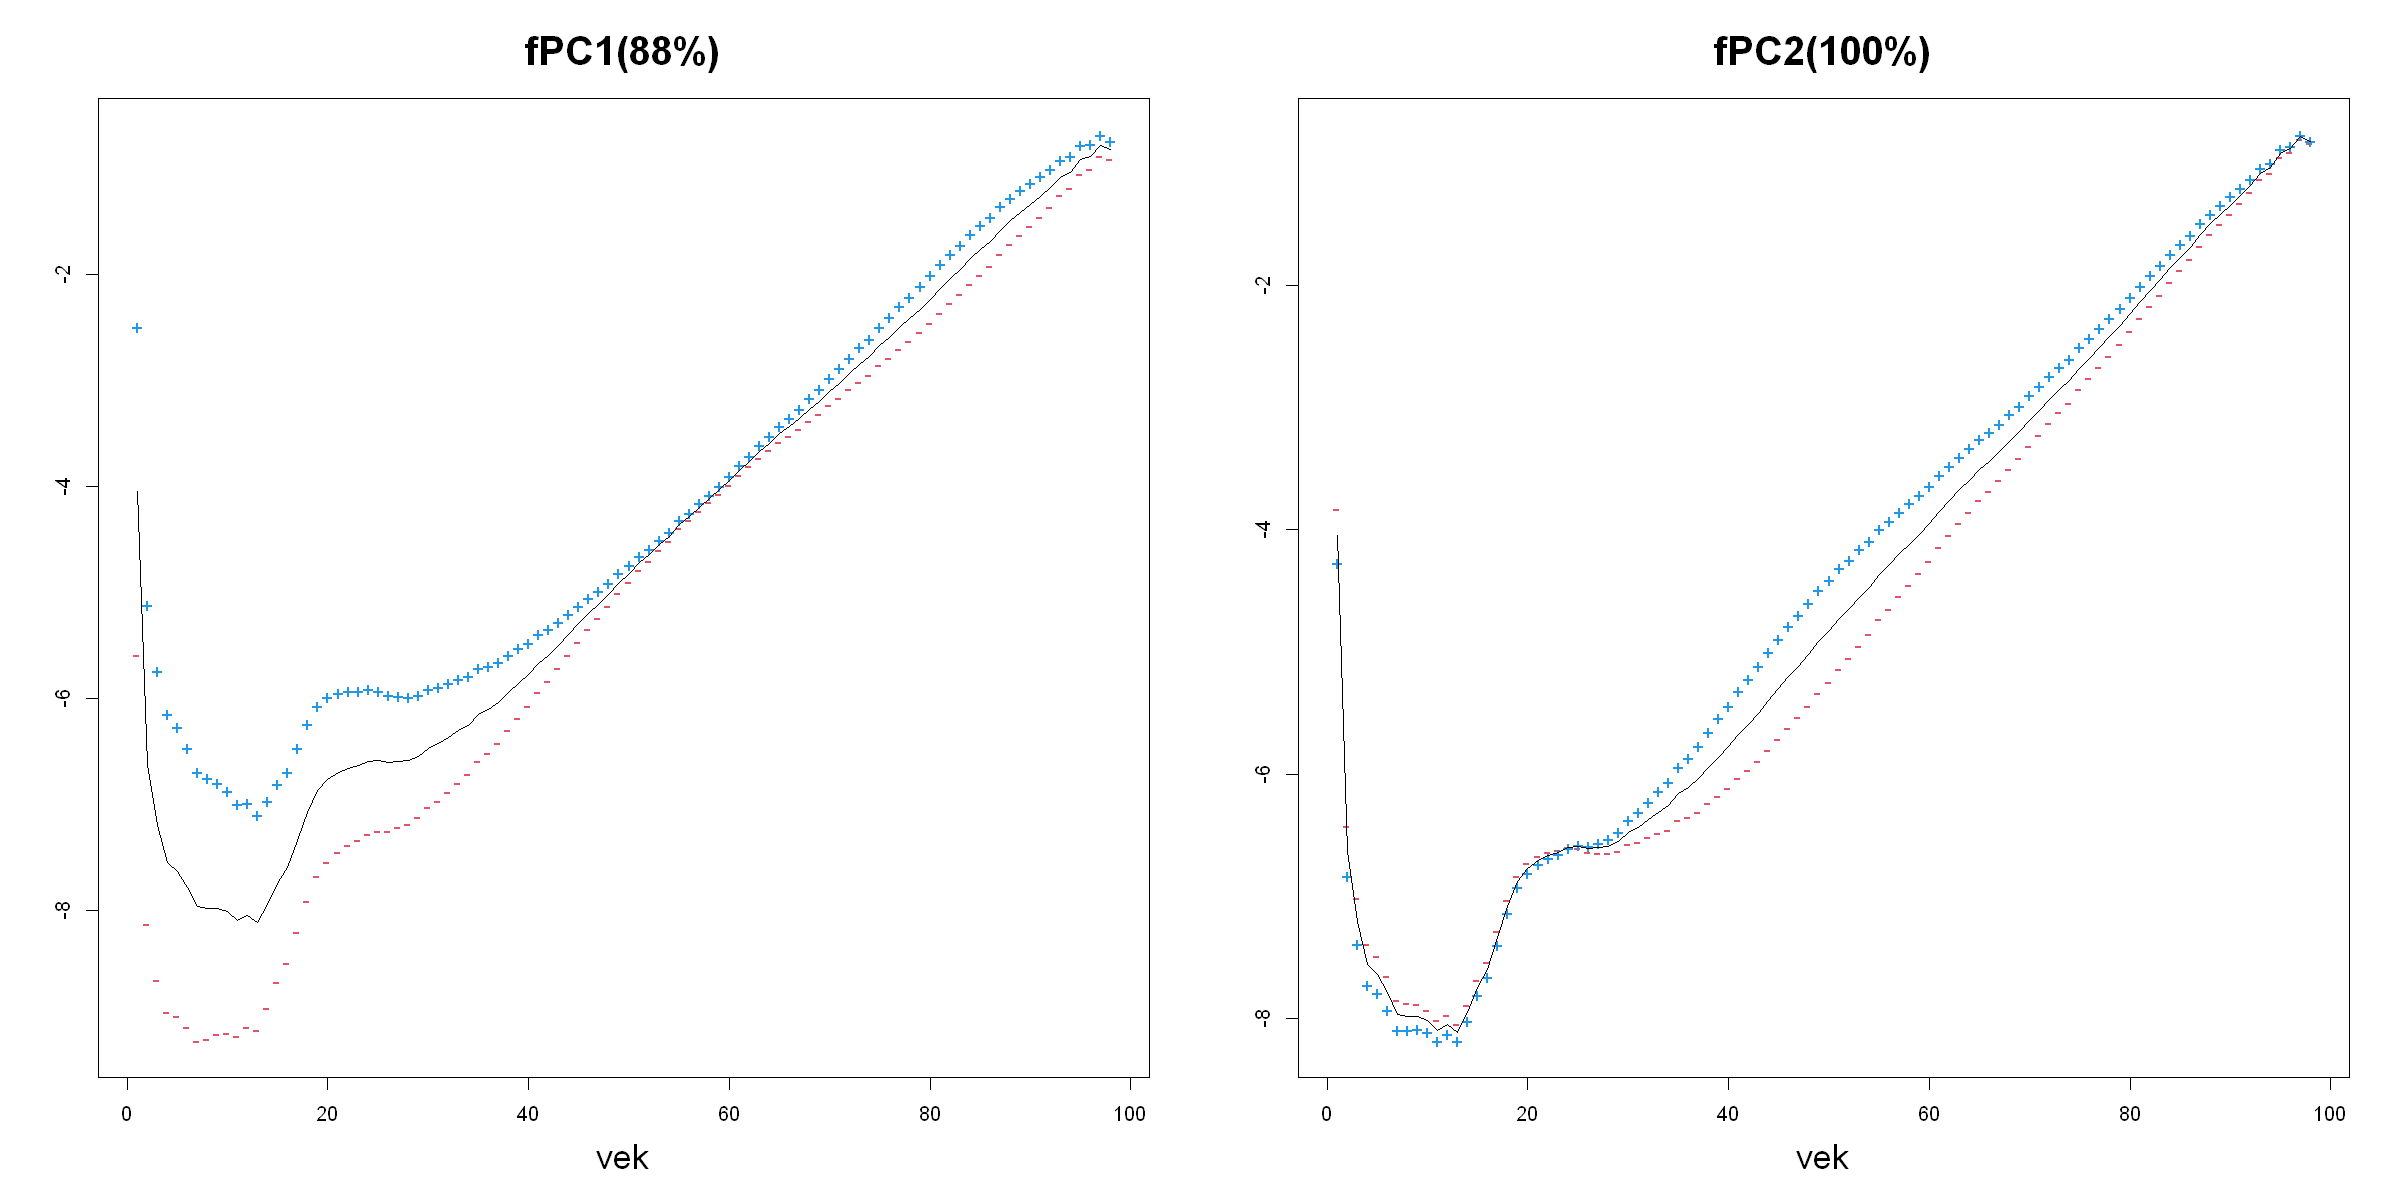

In [10]:
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

k.pc <- 1
mu.hat <- res.face$mu
effect <- efn.face[,k.pc] * 2* sqrt(eval.face[k.pc])
pve.face <- (cumsum(eval.face)/sum(eval.face))
matplot(vek, cbind(mu.hat - effect, mu.hat + effect),
        pch = c("-", "+"), ylab="", xlab="vek", col=c(2,4),
        main=paste0("fPC", k.pc,"(", round(pve.face[k.pc]*100) ,"%)"), cex.main=2, cex.lab=1.75)
lines(vek, mu.hat, lty=1, lwd=1)

k.pc <- 2
mu.hat <- res.face$mu
effect <- efn.face[,k.pc] * 2* sqrt(eval.face[k.pc])
pve.face <- (cumsum(eval.face)/sum(eval.face))

matplot(vek, cbind(mu.hat - effect, mu.hat + effect),
        pch = c("-", "+"), ylab="", xlab="vek", col=c(2,4),
        main=paste0("fPC", k.pc,"(", round(pve.face[k.pc]*100) ,"%)"), cex.main=2, cex.lab=1.75)
lines(vek, mu.hat, lty=1, lwd=1)

* Prvý komponent dáva do kostrastu roky, ktoré sa líšia počas prvých 40 rokov a veľmi slabo líšia potom nad vekom 80 rokov.
* Druhý komponent dáva do kontrastu roky, ktoré sa líšia medzi zhruba 30. a 70. rokom života.

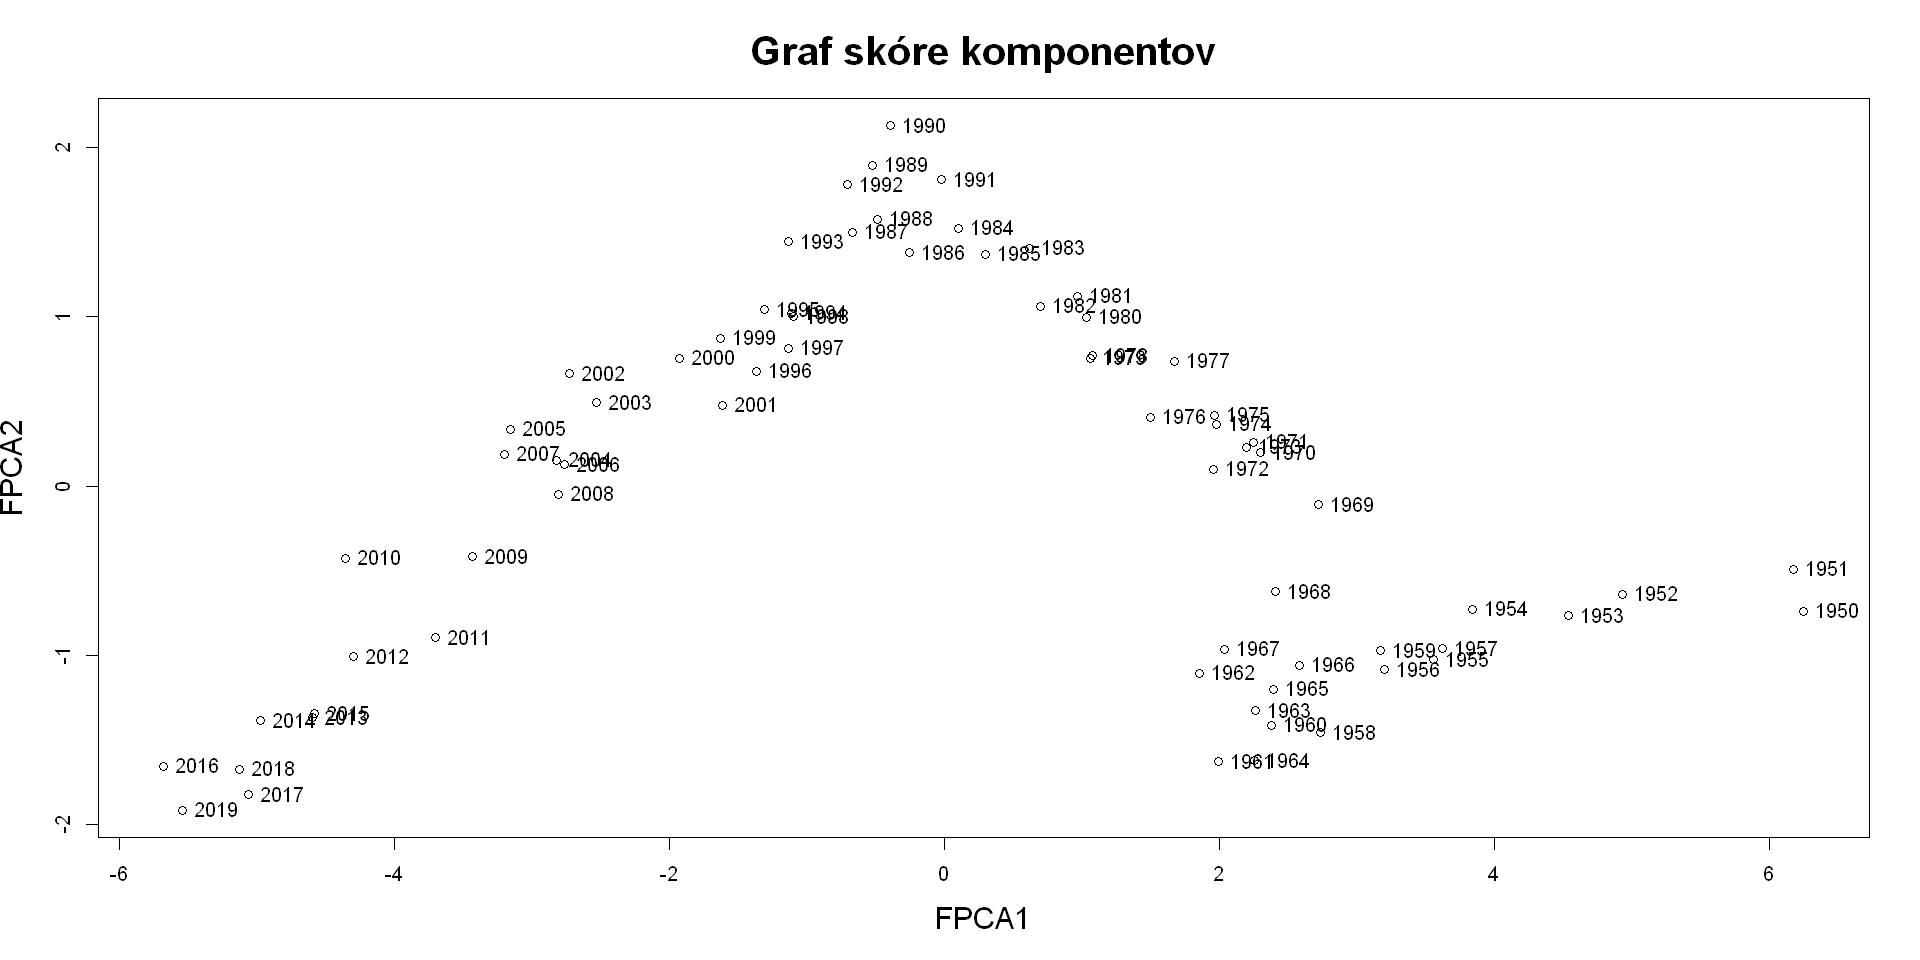

In [11]:
options(repr.plot.width=16, repr.plot.height=8)
plot(res.face$scores, xlab="FPCA1", ylab="FPCA2", main="Graf skóre komponentov", cex.main=2, cex.lab=1.5)
text(res.face$scores[,1],res.face$scores[,2],rownames(res.face$scores),pos=4)

* Môžeme videť, že vysoké skóre prvého komponentu majú roky 1951 a 1950 a najnižšie skóre roky 2016 a 2019, čo vyplýva z toho, že v 50. rokoch 20. storočia bola vyššia úmrtnosť a časom sa znižovala (vo všeobecnosti). 
* Vysoké skóre druhého komponentu majú roky začiatku 90. rokov a najnižšie skóre roky 2019 a 2017, ale aj 1964 a 1961. Teda druhý komponent dáva do kontrastu krivky medzi vekom 30 až 70 rokov. 

Tieto výsledky sú rovnaké, aké sme dostali z grafov pre účinok každého komponentu. 

**<font size=5 color=darkblue> 2. Výnosy Istanbulskej burzy cenných papierov </font>** <br>

**<font size=4 color=darkblue> 2.1 Popis skúmaných dát </font>** <br>

Dátový súbor zahŕňa výnosy Istanbulskej burzy cenných papierov so siedmimi ďalšími medzinárodnými indexmi:
* SP - Standard and Poor's 500 , 
* DAX - Nemecký index ,
* FTSE - Britský index  , 
* NIKKEI - Japonský index, 
* BOVESPA - Brazílsky index, 
* MSCE_EU - index krjín (bývalej politickej) západnej Európy, 
* MSCI_EM - index pre krajiny rýchlo sa rozvíjajúcich ázijských krajín,

 meraných od 5. júna 2009 do 22. februára 2011.

In [12]:
library("readxl")
data <- read_excel("C:/Users/david/jupyter_ntb/data_burza.xlsx")
vek<-1:536

New names:
* ISE -> ISE...2
* ISE -> ISE...3



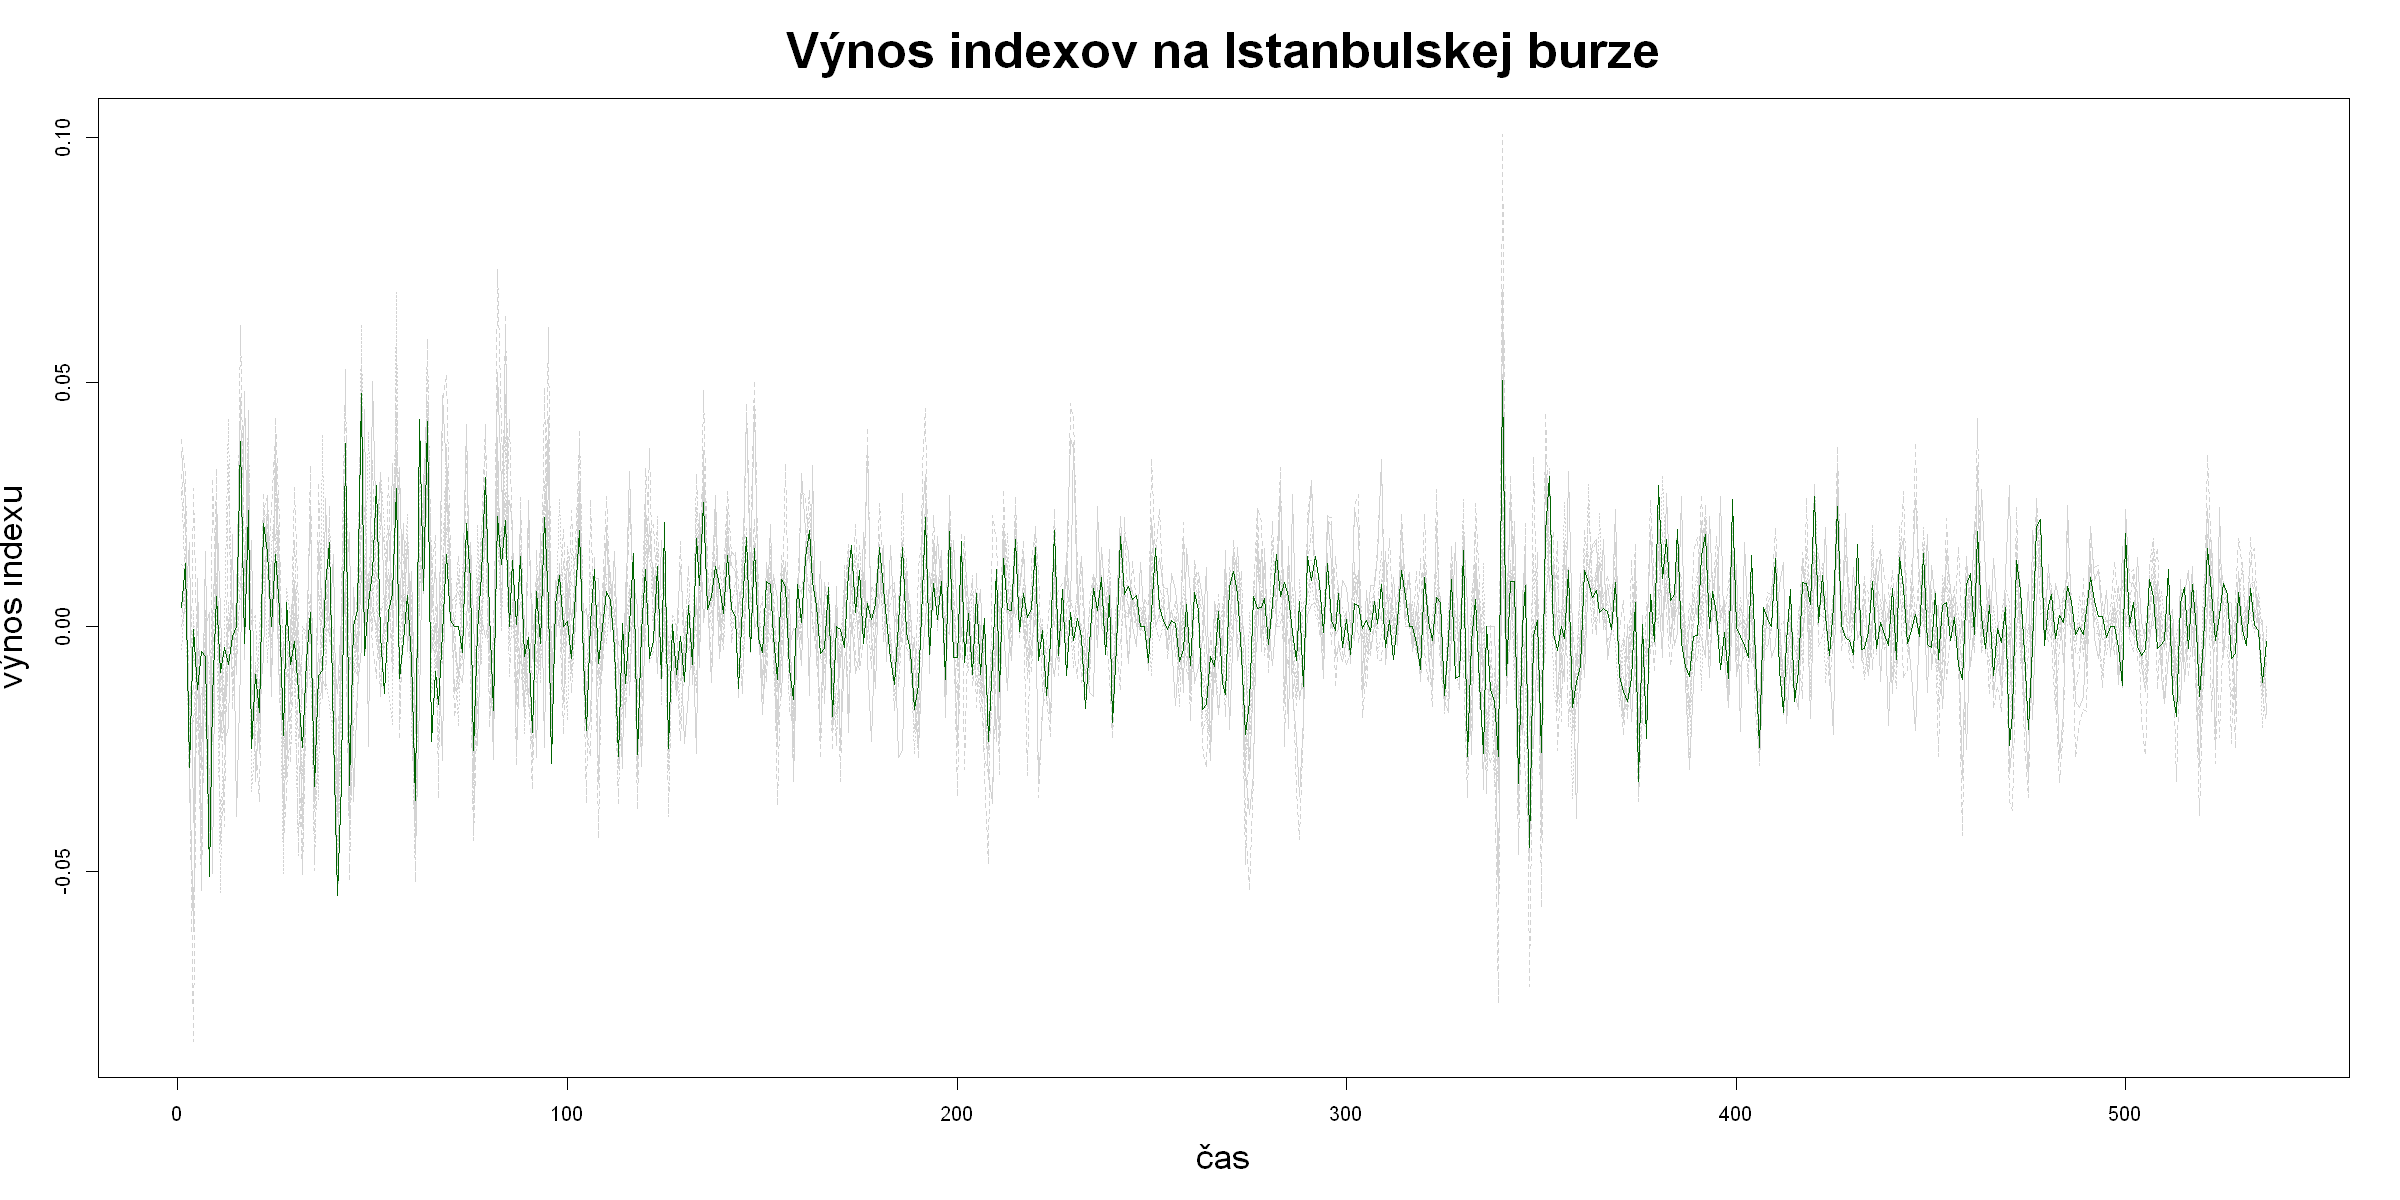

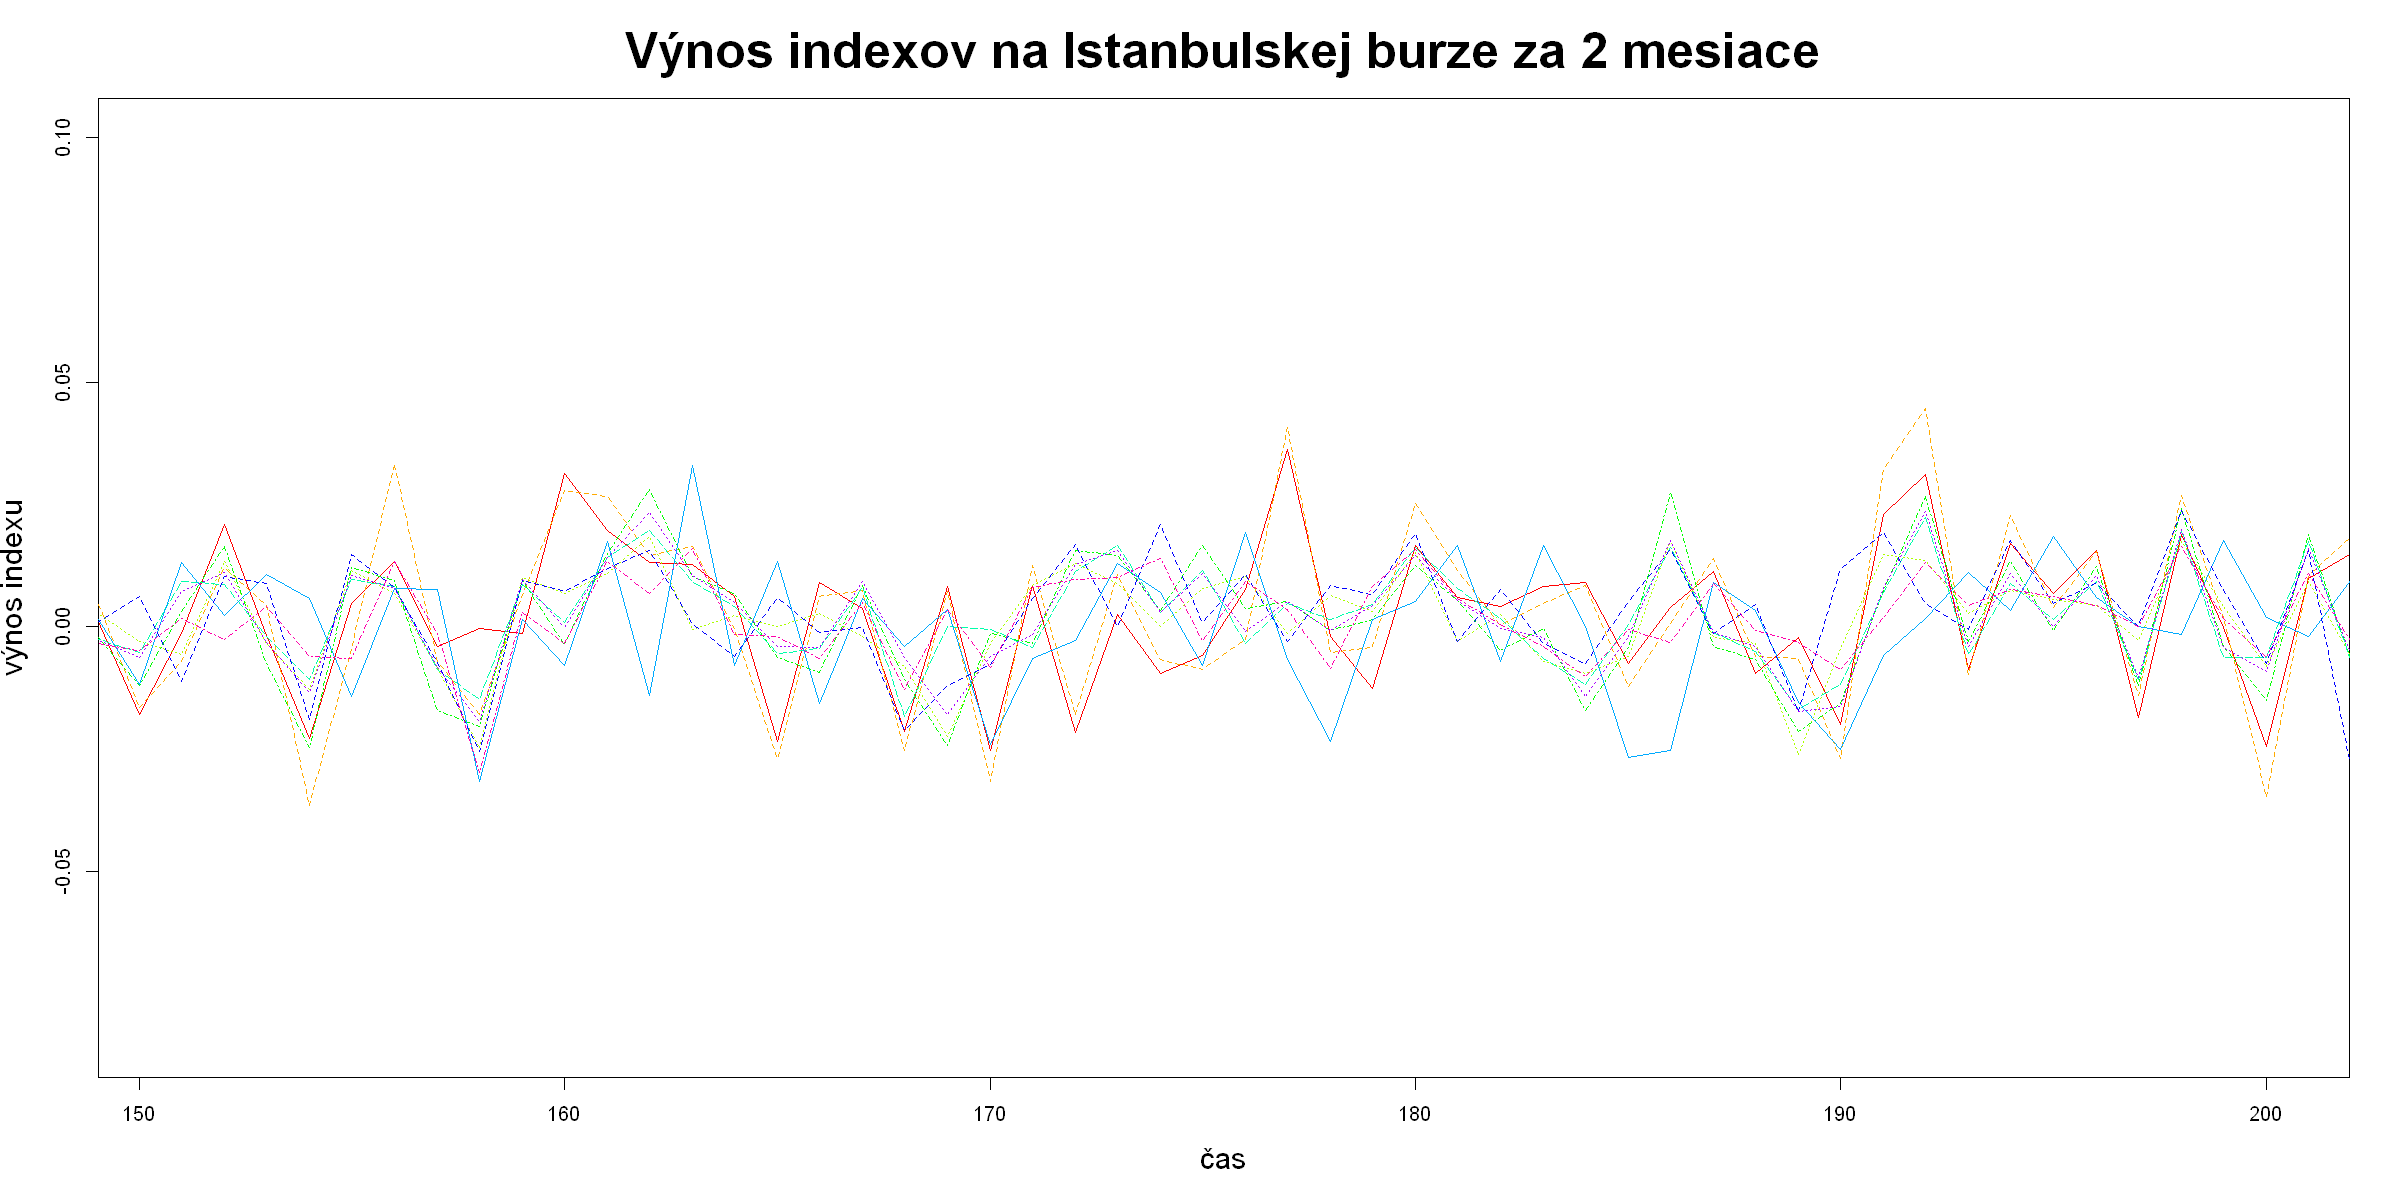

In [13]:
options(repr.plot.width=20, repr.plot.height=10)
matplot(vek, data[,-1], type="l", col="lightgray", main="Výnos indexov na Istanbulskej burze", cex.main=2.5, cex.lab=1.75, 
        ylab="výnos indexu", xlab="čas")
sel.crv <- sample(1:9, size = 1, replace = FALSE)
matlines(vek, data[,sel.crv], type='l', lty=1, lwd=1, col = "darkgreen")

matplot(vek, data[,-1], type="l", col=rainbow(9), main="Výnos indexov na Istanbulskej burze za 2 mesiace", cex.main=2.5, cex.lab=1.5, 
        xlim=c(151,200), ylab="výnos indexu", xlab="čas")

**<font size=4 color=darkblue> 2.2 Implementácia FPCA a interpretácia výsledkov </font>** <br>

[1] 2

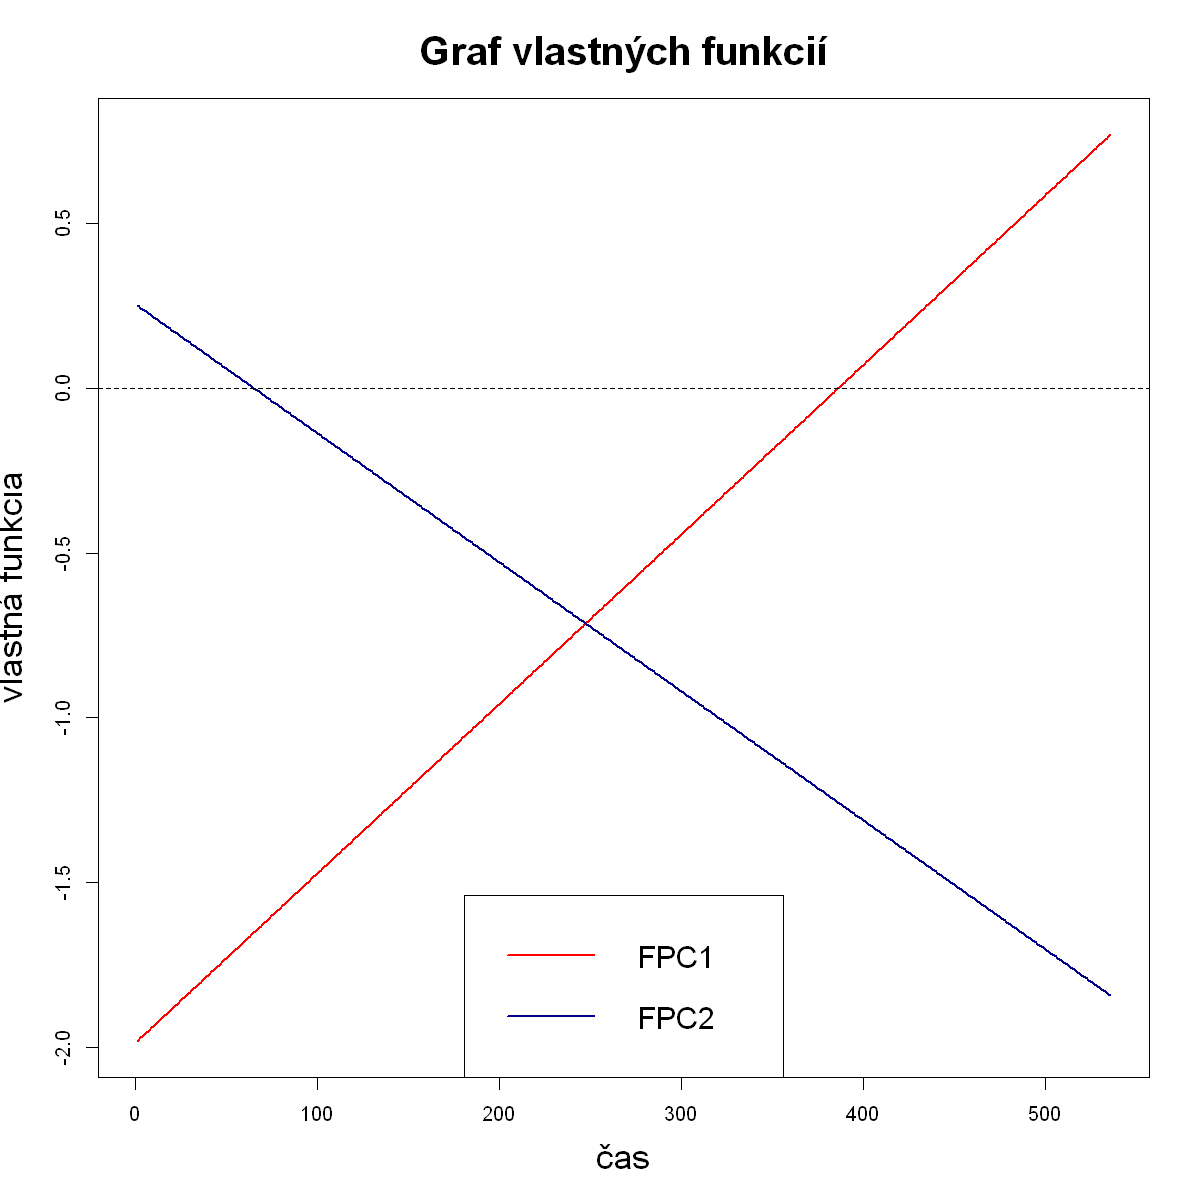

In [14]:
res.face <- fpca.face(Y = t(data[,-1]), argvals = 1:536, pve = 0.95)

efn.face <- res.face$efunctions*sqrt(536)
eval.face <- res.face$evalues/536

options(repr.plot.width=10, repr.plot.height=10)

matplot(1:536, efn.face[,1:res.face$npc], col=c("red", "darkblue"), 
        type='l', lty=1, lwd=2,
        ylab="vlastná funkcia", xlab="čas",
        main="Graf vlastných funkcií", cex.main=2, cex.lab=1.75)
abline(0,0, lty=2)
legend("bottom", lwd=2, lty=1, col=c("red", "darkblue"), 
      legend = paste0("FPC", 1:2),cex=1.5)

Vlastné funkcie sú síce lineárne, ale tažšie na interpretáciu. Môžme teraz len hádať, ako si ich vysvetliť, najviac nám môže pomôcť graf skóre komponentov. Predtým si ale ešte vykreslíme grafy účinkov komponentov na krivku priemeru. 

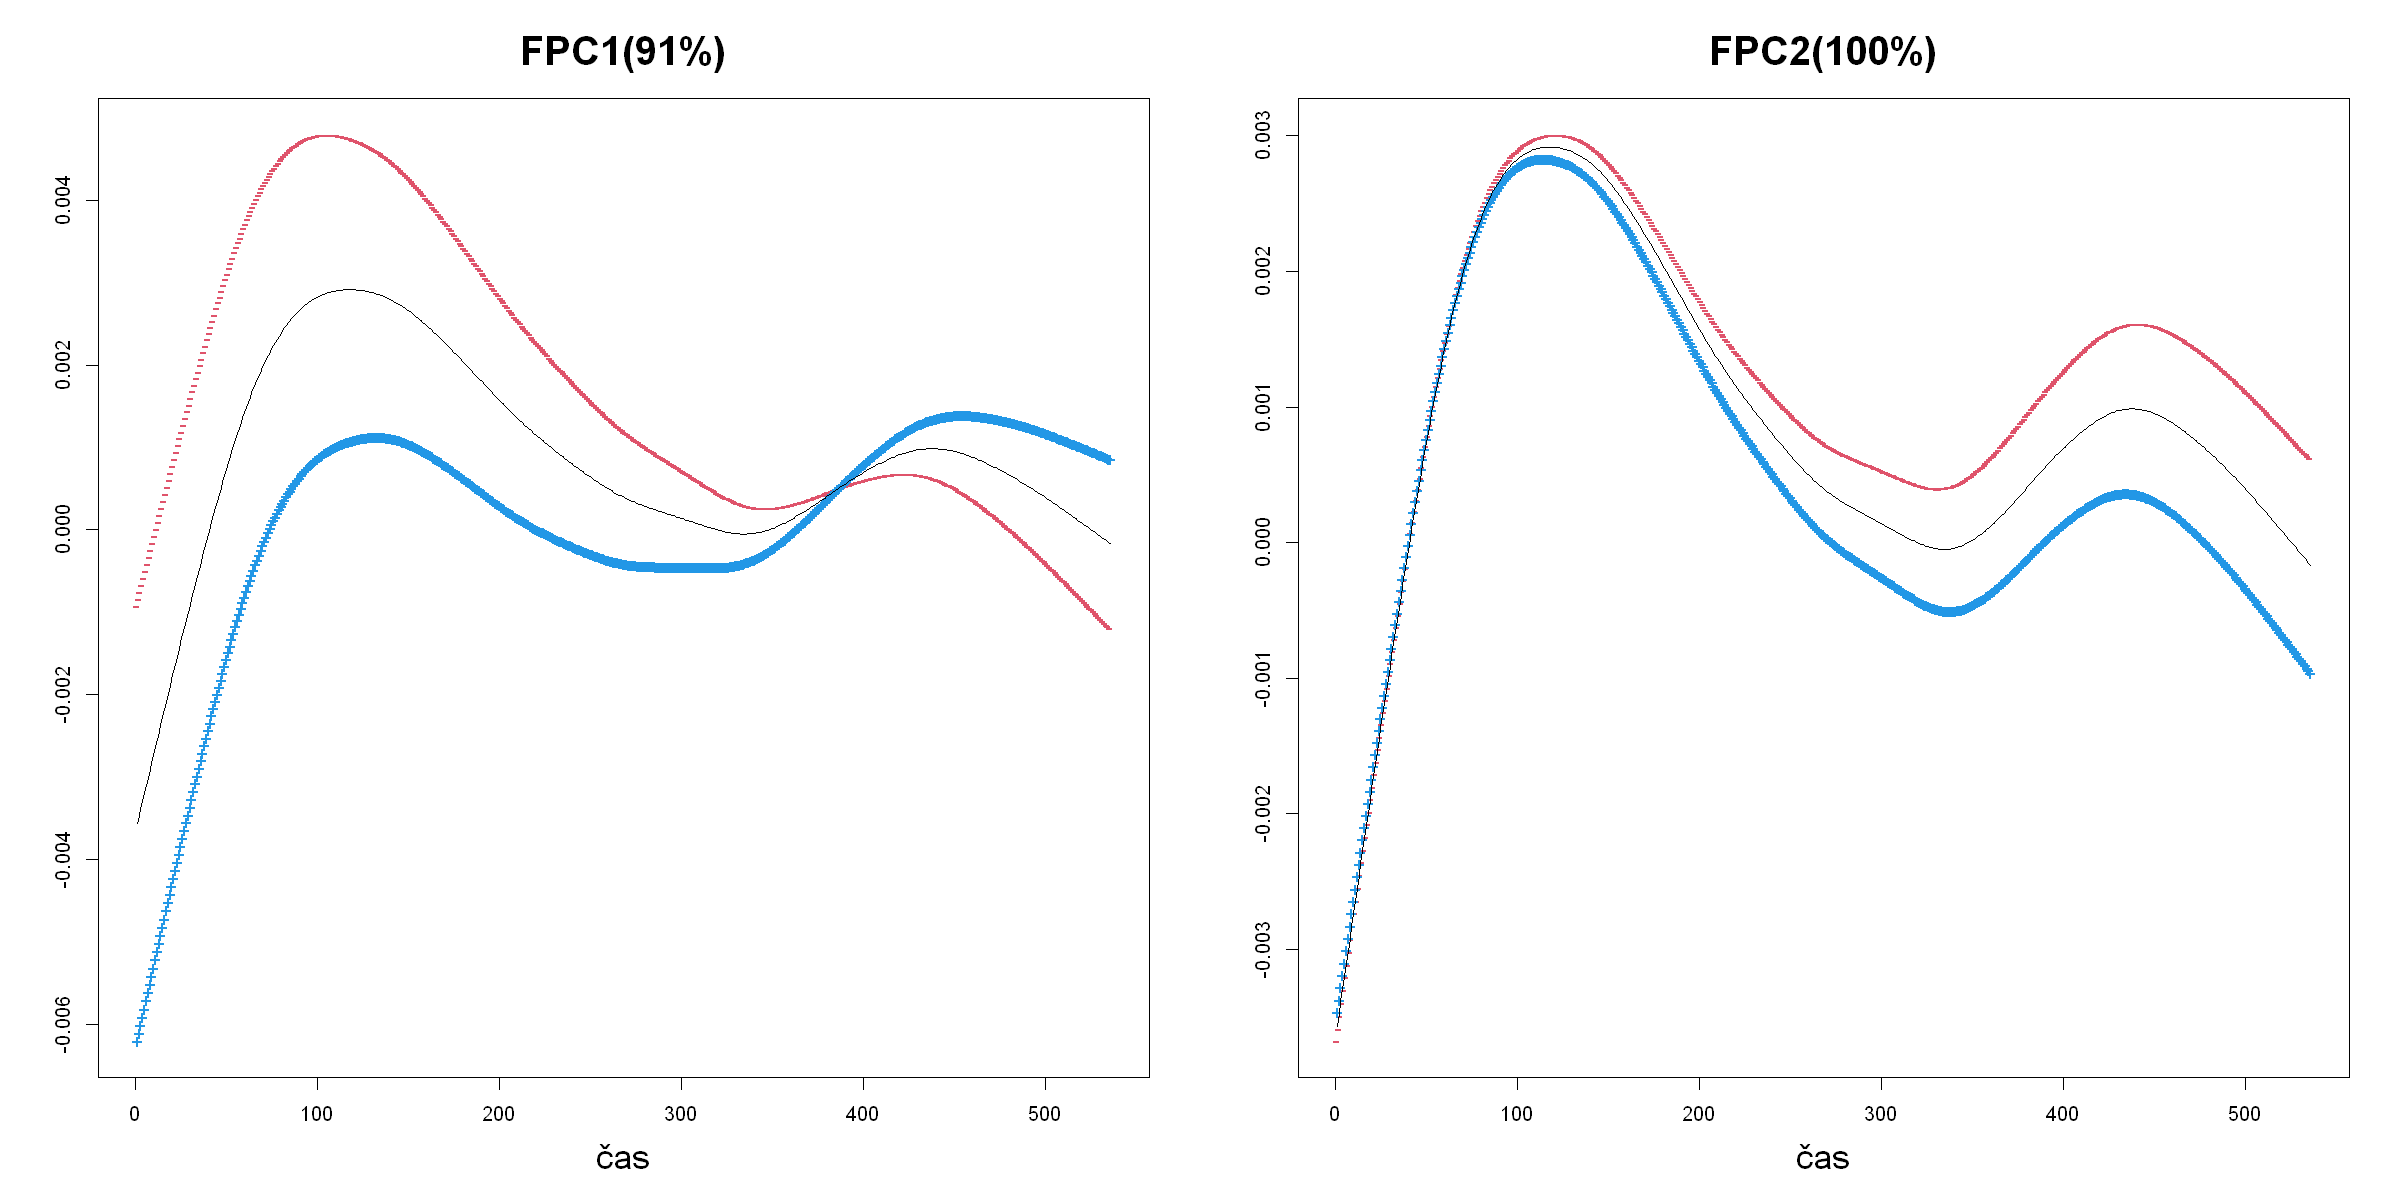

In [15]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))
for (i in 1:2){
 k.pc <- i
mu.hat <- res.face$mu
effect <- efn.face[,k.pc] * 2* sqrt(eval.face[k.pc])
pve.face <- (cumsum(eval.face)/sum(eval.face))

matplot(vek, cbind(mu.hat - effect, mu.hat + effect),
        pch = c("-", "+"), ylab="", xlab="čas", col=c(2,4),
        main=paste0("FPC", k.pc,"(", round(pve.face[k.pc]*100) ,"%)"), cex.main=2, cex.lab=1.75)
lines(vek, mu.hat, lty=1, lwd=1)   
    
}

* Prvý komponent dáva do kontrastu indexy, ktoré sa líšia zhruba prvých 350 obchodovacích dní zo sledovaného obdobia, čo je zhruba 1 a pol kalendárneho roka a zároveň vysvetlí až **91% variability** pôvodných dát.
* Druhý komponent dáva do konstrastu inexy, ktoré sa líšia zhruba v druhej polovici sledovaného obdobia a zároveň spolu s prvou kompoentou vysvetlia až **100% variability** pôvodných dát. 

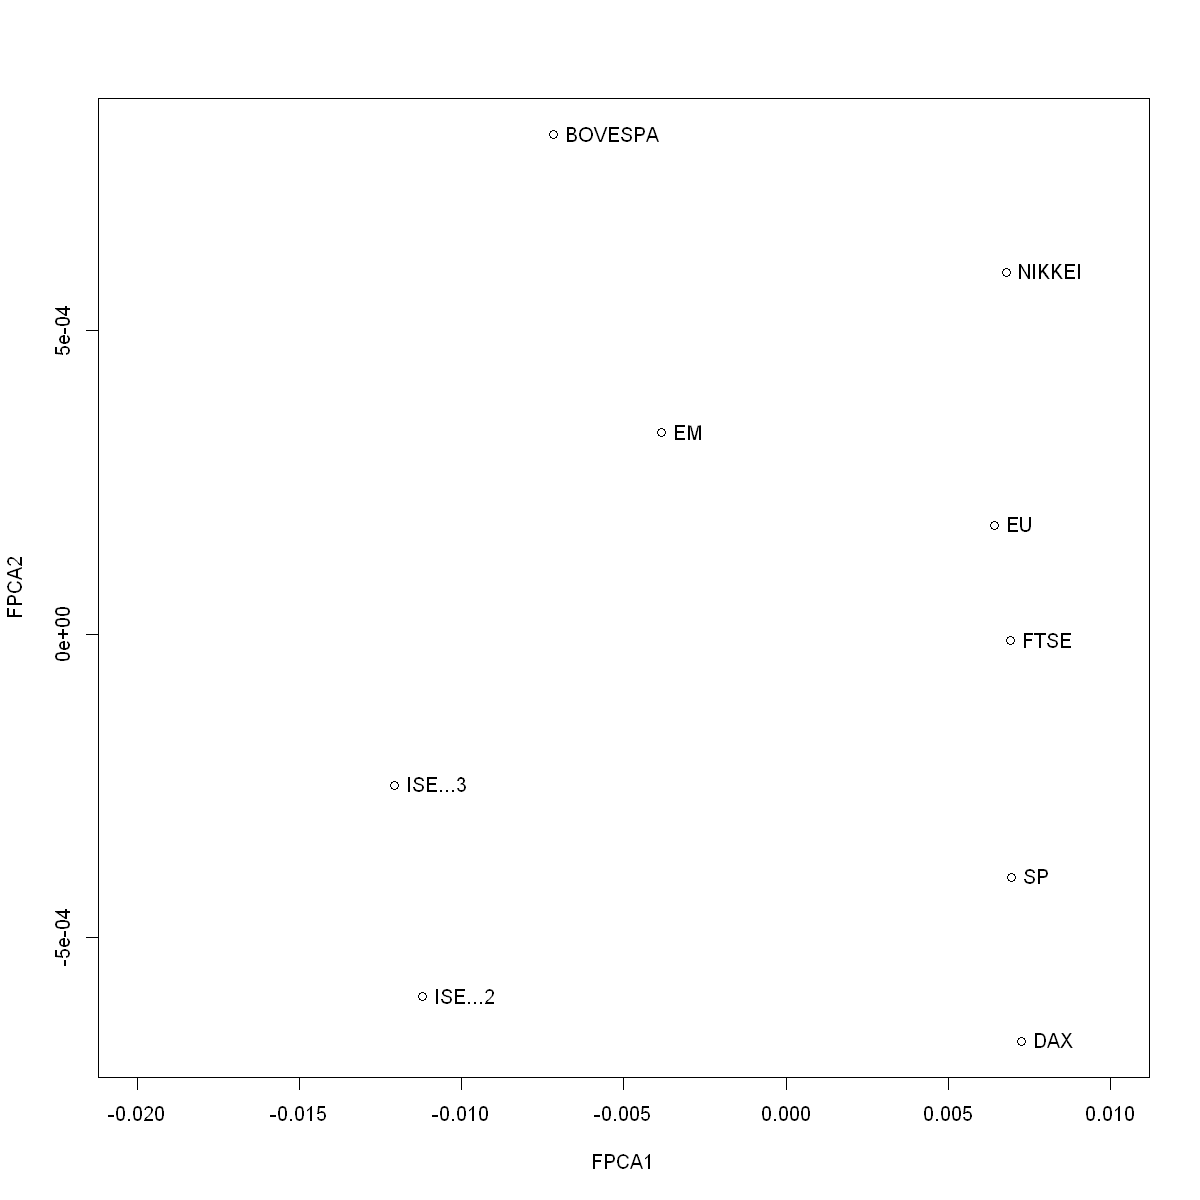

In [16]:
options(repr.plot.width=10, repr.plot.height=10)
plot(res.face$scores, xlab="FPCA1", ylab="FPCA2", xlim=c(-0.02,0.01))
text(res.face$scores[,1],res.face$scores[,2],rownames(res.face$scores),pos=4)

Graf skóre komponentov nám dáva nasledujúce vysvetlenie:
* vysoké skóre prvého komponentu majú indexy krajín rozvinutého sveta (Nemecko, Spojené kráľovstvo, Japonsko, Európa) a nízke skóre prvého komponentu majú indexy krajín rýchlo rozvíjajúceho sa sveta (ázijske krajiny, Turecko, Brazília).
* Druhý komponnt nám dáva do kontrastu indexy krajín s nízkym skóre druhého komponentu (Nemecko, USA a Turecko), voči krajinám s vysokým skóre pre druhý komponent (Brazília, Japonsko). Zdá sa, že tento komponent delí krajiny vzhľadom na ich zemepisnú dĺžku.

***
<a id=References></a>
# <font color=darkblue> Zdroje </font>
* https://www.mortality.org/Country/Country?cntr=SVK
* http://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE
